In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer 

from wordcloud import WordCloud
from collections import Counter
from tqdm import trange
from gensim import corpora, models


In [25]:
TRAIN = "dataset.csv" 

In [26]:
datas = pd.read_csv(TRAIN)

In [28]:
datas.shape

(20491, 2)

In [27]:
data = datas.iloc[:20000]

In [28]:
def text_preprocessing(a):
  a=re.sub('[^a-zA-Z ]','',a)
  a=a.lower().split()
  wn=WordNetLemmatizer()
  sw = stopwords.words('english')
  clean_word=[wn.lemmatize(i) for i in a if not i in sw]
  sen=' '.join(clean_word)
  return sen

In [29]:
data['Preprocessed'] = data['Review'].apply(text_preprocessing)

In [81]:
data

,Unnamed: 0,Review,Rating,Preprocessed
0,0,nice hotel expensive parking got good deal sta...,2,nice hotel expensive parking got good deal sta...
1,1,ok nothing special charge diamond member hilto...,0,ok nothing special charge diamond member hilto...
2,2,nice rooms not 4* experience hotel monaco seat...,1,nice room experience hotel monaco seattle good...
3,3,"unique, great stay, wonderful time hotel monac...",2,unique great stay wonderful time hotel monaco ...
4,4,"great stay great stay, went seahawk game aweso...",2,great stay great stay went seahawk game awesom...
...,...,...,...,...
19995,19995,great time fusion suites stayed grand suite ba...,2,great time fusion suite stayed grand suite ban...
19996,19996,perfect absolutely loved place really best wor...,2,perfect absolutely loved place really best wor...
19997,19997,hotel immaculate chose hotel reviews tripadvis...,2,hotel immaculate chose hotel review tripadviso...
19998,19998,highly recommended time fusion suites definete...,2,highly recommended time fusion suite definetel...


In [31]:
NB = MultinomialNB()
KNN = KNeighborsClassifier()

In [7]:
def rating_label(rating):
    if rating > 3:
        return "Positive"
    elif rating <3:
        return "Negative"
    else:
        return "Neutral"

In [11]:

x = data['Preprocessed']
y = data['Rating'].apply(rating_label)



In [34]:
data.to_csv('preprocessed.csv')

In [65]:
data = pd.read_csv('preprocessed.csv')

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=42)

In [13]:
extract = CountVectorizer()
x_train = extract.fit_transform(x_train)
x_test = extract.transform(x_test)

In [38]:
x.shape

(20000,)

In [2]:
import pickle

    
    

In [40]:
# train_sk(NB)

In [41]:
# train_sk(KNN)

# using Positive, neutral And Negative


Model MultinomialNB(): 
accuracy : 83.68333333333334

              precision    recall  f1-score   support

    Negative       0.67      0.83      0.74       770
     Neutral       0.02      0.56      0.03        18
    Positive       0.99      0.84      0.91      5212

    accuracy                           0.84      6000
   macro avg       0.56      0.74      0.56      6000
weighted avg       0.95      0.84      0.88      6000



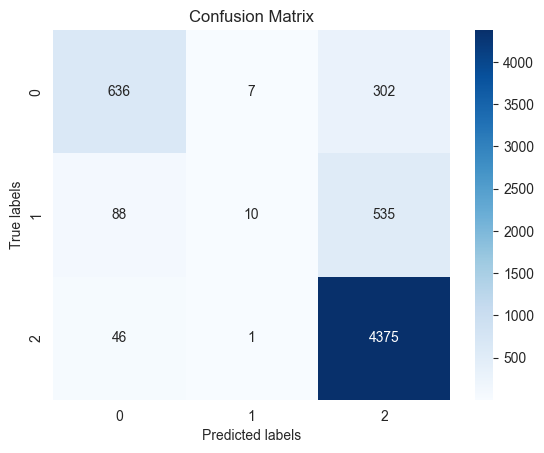

In [42]:
print(f"\nModel {NB}: ")
NB.fit(x_train,y_train)
pred = NB.predict(x_test)
print(f"accuracy : {accuracy_score(y_test,pred)*100}")
cm = confusion_matrix(y_test,pred)
print(f"\n{classification_report(pred,y_test)}")
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

file = open(f'NB.pickle','wb')
pickle.dump(NB,file)
file.close()


Model KNN: 
accuracy : 74.41666666666666

              precision    recall  f1-score   support

    Negative       0.18      0.62      0.28       274
     Neutral       0.08      0.20      0.11       250
    Positive       0.96      0.78      0.86      5476

    accuracy                           0.74      6000
   macro avg       0.41      0.53      0.42      6000
weighted avg       0.89      0.74      0.80      6000



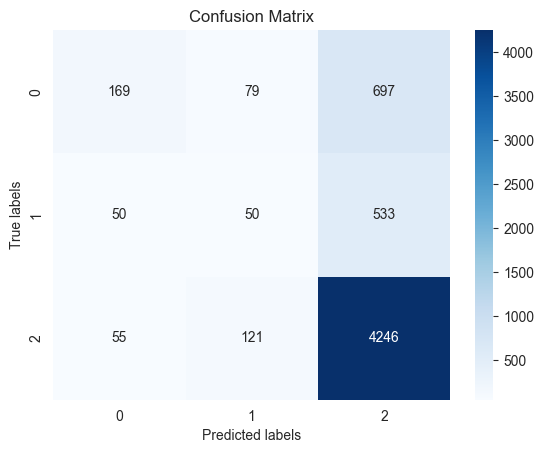

In [43]:
print(f"\nModel KNN: ")
KNN.fit(x_train,y_train)
pred = KNN.predict(x_test)
print(f"accuracy : {accuracy_score(y_test,pred)*100}")
cm = confusion_matrix(y_test,pred)
print(f"\n{classification_report(pred,y_test)}")
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

file = open('KNN.pickle','wb')
pickle.dump(KNN,file)
file.close()

In [16]:
with open('KNN.pickle','rb') as file:
    KNN = pickle.load(file)

with open('NB.pickle','rb') as file:
    NB = pickle.load(file)

In [31]:
data_testing = pd.read_csv('reviews.csv')

In [32]:
data_testing.shape

(342904, 6)

In [84]:
data_batch = pd.read_csv('data_preprocessed.csv')

In [86]:
data_batch.shape

(20000, 3)

In [5]:
data_batch['Preprocessed'].isna().sum()
data_batch = data_batch.dropna(axis=0)

In [14]:
x = extract.transform(data_batch['Preprocessed'])

In [17]:
NB_Pred = NB.predict(x)

In [18]:
KNN_Pred = KNN.predict(x)

In [20]:
data_batch['NB Predict'] = NB_Pred

In [21]:
data_batch['KNN Predict'] = KNN_Pred

In [22]:
data_batch

,Unnamed: 0,comments,Preprocessed,NB Predict,KNN Predict
0,0,Daniel is really cool. The place was nice and ...,daniel really cool place nice clean quiet neig...,Positive,Positive
1,1,If you want the authentic Amsterdam houseboat ...,want authentic amsterdam houseboat experience ...,Positive,Positive
2,2,Unique and luxurious to be sure. I couldn't re...,unique luxurious sure couldnt recommend stayin...,Positive,Positive
3,3,Daniel is the most amazing host! His place is ...,daniel amazing host place extremely clean prov...,Positive,Positive
4,4,My wife and I recently stopped in Amsterdam fo...,wife recently stopped amsterdam day honeymoon ...,Positive,Positive
...,...,...,...,...,...
19995,19995,"It was a very pleasant stay, the place was ver...",pleasant stay place nice ned wife excellent pe...,Positive,Positive
19996,19996,Cousy place and nice host!,cousy place nice host,Positive,Neutral
19997,19997,We loved staying here. We would’ve stayed here...,loved staying wouldve stayed whole trip wasnt ...,Positive,Positive
19998,19998,Hält was es verspricht! Sehr gemütlich und sch...,hlt e verspricht sehr gemtlich und schne lage ...,Positive,Positive


In [23]:
data_batch.to_csv('data_output.csv')

# .

# .

# .

# .

# .

# .

In [3]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from transformers import get_linear_schedule_with_warmup



In [60]:
# Memuat Tokenizer dan Model BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)



C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [66]:
def labelEncoder(val):
    if val == 'Positive':
        return 2
    elif val == 'Negative':
        return 0
    else:
        return 1

In [68]:
data['Rating'] = data['Rating'].apply(rating_label)
data['Rating'] = data['Rating'].apply(labelEncoder)

In [69]:
data

,Unnamed: 0,Review,Rating,Preprocessed
0,0,nice hotel expensive parking got good deal sta...,2,nice hotel expensive parking got good deal sta...
1,1,ok nothing special charge diamond member hilto...,0,ok nothing special charge diamond member hilto...
2,2,nice rooms not 4* experience hotel monaco seat...,1,nice room experience hotel monaco seattle good...
3,3,"unique, great stay, wonderful time hotel monac...",2,unique great stay wonderful time hotel monaco ...
4,4,"great stay great stay, went seahawk game aweso...",2,great stay great stay went seahawk game awesom...
...,...,...,...,...
19995,19995,great time fusion suites stayed grand suite ba...,2,great time fusion suite stayed grand suite ban...
19996,19996,perfect absolutely loved place really best wor...,2,perfect absolutely loved place really best wor...
19997,19997,hotel immaculate chose hotel reviews tripadvis...,2,hotel immaculate chose hotel review tripadviso...
19998,19998,highly recommended time fusion suites definete...,2,highly recommended time fusion suite definetel...


In [70]:
# Tokenisasi dan Pembuatan Tensor Input
inputs = tokenizer(data['Preprocessed'].tolist(), return_tensors="pt", padding=True, truncation=True, max_length=512)
input_ids = inputs["input_ids"]
attention_mask = inputs["attention_mask"]
labels = torch.tensor(data['Rating'].tolist())



In [71]:
# Membuat Dataset dan DataLoader
dataset = TensorDataset(input_ids, attention_mask, labels)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=2, shuffle=False)


In [72]:

# Mengatur Optimizer dan Scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
epochs = 3
total_steps = len(train_loader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)



C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [77]:
# Fungsi untuk Melatih Model
def train(model, dataloader):
    model.train()
    total_loss = 0
    for batch in dataloader:
        b_input_ids, b_attention_mask, b_labels = batch
        # print(batch)
        model.zero_grad()
        outputs = model(b_input_ids, attention_mask=b_attention_mask, labels=b_labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        scheduler.step()
    avg_loss = total_loss / len(dataloader)
    print(f"Training loss: {avg_loss}")



In [78]:
# Fungsi untuk Evaluasi Model
def evaluate(model, dataloader):
    model.eval()
    total_loss = 0
    correct_predictions = 0
    with torch.no_grad():
        for batch in dataloader:
            b_input_ids, b_attention_mask, b_labels = batch
            outputs = model(b_input_ids, attention_mask=b_attention_mask, labels=b_labels)
            loss = outputs.loss
            logits = outputs.logits
            total_loss += loss.item()
            predictions = torch.argmax(logits, dim=-1)
            correct_predictions += torch.sum(predictions == b_labels).item()
    avg_loss = total_loss / len(dataloader)
    accuracy = correct_predictions / len(dataloader.dataset)
    print(f"Validation loss: {avg_loss}")
    print(f"Validation accuracy: {accuracy}")



In [79]:
data['Rating'].value_counts()

Rating
2    14769
0     3118
1     2113
Name: count, dtype: int64

In [ ]:
# Melatih dan Mengevaluasi Model
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    train(model, train_loader)
    evaluate(model, val_loader)



Epoch 1/3


In [48]:
# Membuat Prediksi pada Data Baru
def predict(model, texts):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(inputs["input_ids"], attention_mask=inputs["attention_mask"])
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)
    return predictions



In [ ]:
# Contoh Prediksi
new_texts = ["I enjoy learning new programming languages", "Debugging is frustrating"]
predictions = predict(model, new_texts)
print(predictions)  # Output: tensor([1, 0])
